<a href="https://colab.research.google.com/github/currencyfxjle/Bitcoin-Oct-Nov-2023/blob/main/Bitcoin_S%26P500_NASDAQ_GOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

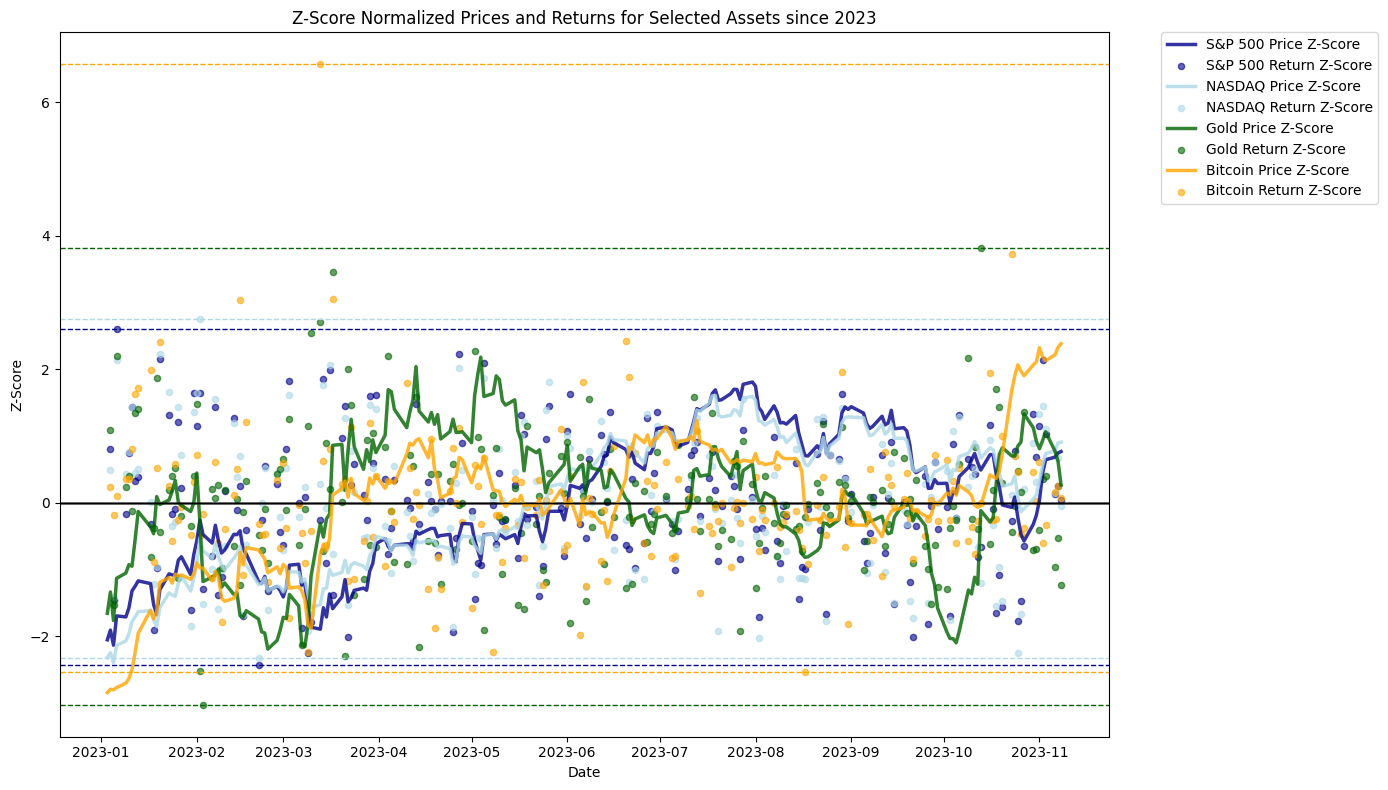

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Define the list of tickers and labels
tickers = ["^GSPC", "^IXIC", "GLD", "BTC-USD"]
labels = ["S&P 500", "NASDAQ", "Gold", "Bitcoin"]
colors = ["darkblue", "lightblue", "darkgreen", "orange"]

# Define start and end dates
start_date = '2023-01-01'
end_date = '2023-12-31'

# Retrieve the data for each ticker using yfinance
data = pd.DataFrame()
for ticker in tickers:
    temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    temp_data = temp_data["Adj Close"]
    data[ticker] = temp_data

# Calculate the returns of each ticker
returns = data.pct_change().dropna()

# Normalize the price and returns using Z-score
z_scores_prices = data.apply(zscore)
z_scores_returns = returns.apply(zscore)

# Plot the normalized prices and returns for each ticker
fig, ax = plt.subplots(figsize=(14, 8))

for i, ticker in enumerate(tickers):
    # Plot Z-score normalized prices with increased line width and reduced transparency (higher alpha)
    ax.plot(data.index, z_scores_prices[ticker], label=f"{labels[i]} Price Z-Score",
            color=colors[i], linewidth=2.5, alpha=0.8)

    # Scatter plot for Z-score normalized returns with larger marker size
    ax.scatter(returns.index, z_scores_returns[ticker], label=f"{labels[i]} Return Z-Score",
               alpha=0.6, color=colors[i], s=20)  # s controls the size of the markers

    # Add a horizontal line at 0
    ax.axhline(0, color="black", linewidth=1)

    # Support and Resistance Levels for Returns
    resistance_level = z_scores_returns[ticker].max()
    support_level = z_scores_returns[ticker].min()

    # Use the same color for resistance and support levels of returns
    ax.axhline(resistance_level, color=colors[i], linestyle="--", linewidth=1)
    ax.axhline(support_level, color=colors[i], linestyle="--", linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Z-Score')
ax.set_title('Z-Score Normalized Prices and Returns for Selected Assets since 2023')
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from scipy.stats import zscore

# Define the list of tickers and labels
tickers = ["GLD", "BTC-USD"]
labels = ["Gold", "Bitcoin"]
colors = {"Gold": "darkgreen", "Bitcoin": "orange"}

# Define start and end dates
start_date = '2023-06-01'
end_date = '2023-12-31'

# Retrieve the data for each ticker using yfinance
data = pd.DataFrame()
for ticker in tickers:
    temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    temp_data = temp_data["Adj Close"]
    data[ticker] = temp_data

# Calculate the returns of each ticker
returns = data.pct_change().dropna()

# Normalize the price and returns using Z-score
z_scores_prices = data.apply(zscore)
z_scores_returns = returns.apply(zscore)

# Create the figure for the interactive plot
fig = go.Figure()

for ticker, label in zip(tickers, labels):
    # Add Z-score normalized prices
    fig.add_trace(go.Scatter(x=data.index, y=z_scores_prices[ticker], mode='lines',
                             name=f"{label} Price Z-Score", line=dict(color=colors[label], width=2)))

    # Add Z-score normalized returns
    fig.add_trace(go.Scatter(x=returns.index, y=z_scores_returns[ticker], mode='markers',
                             name=f"{label} Return Z-Score", marker=dict(color=colors[label], size=6)))

# Add horizontal line at 0 for reference
fig.add_shape(type="line", line=dict(dash='dash', width=1, color="black"),
              x0=start_date, x1=end_date, y0=0, y1=0)

# Update layout for a cleaner look
fig.update_layout(title='Z-Score Normalized Prices and Returns for Selected Assets since 2023',
                  xaxis_title='Date',
                  yaxis_title='Z-Score',
                  legend=dict(x=1, y=1, bgcolor='rgba(255,255,255,0)'),
                  margin=dict(l=0, r=0, t=30, b=20))

fig.show()

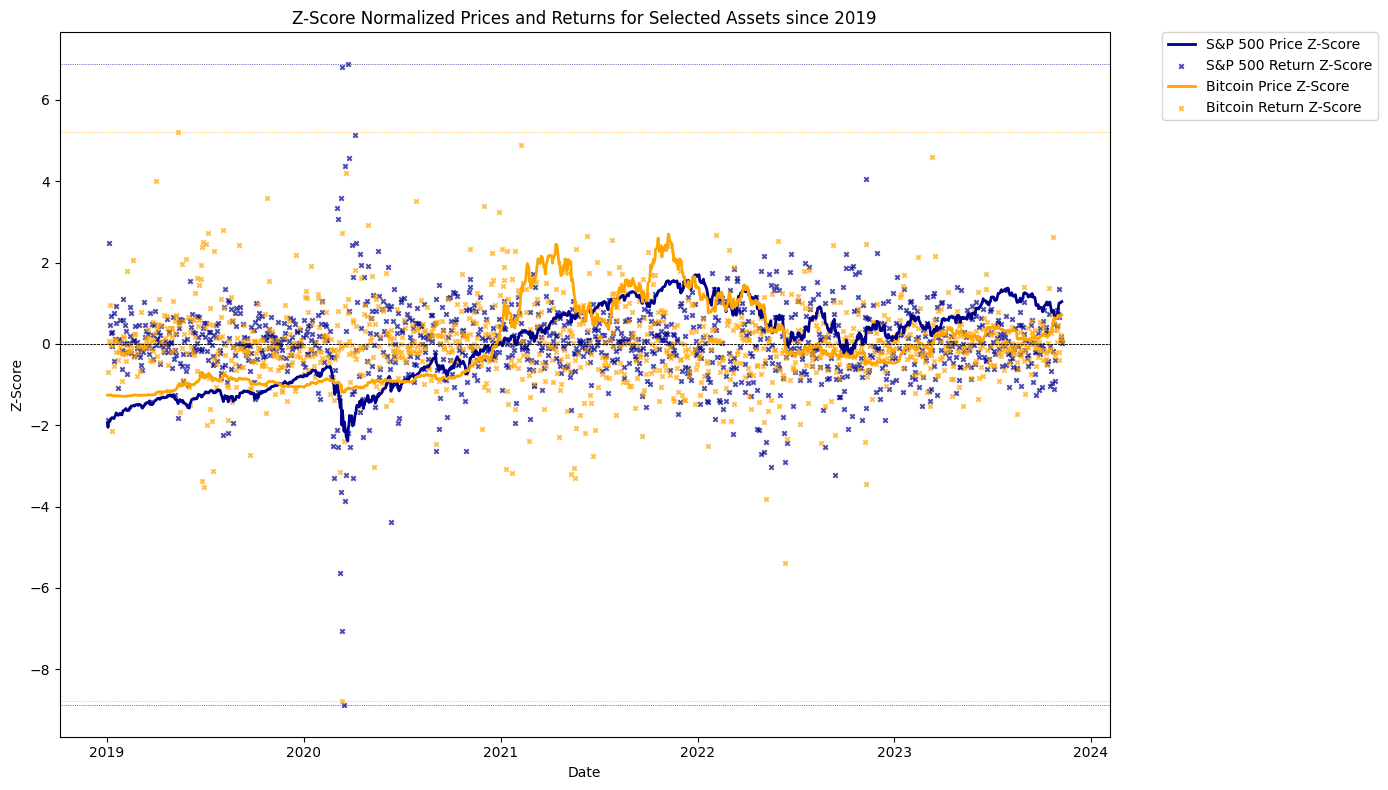

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Define the list of tickers and labels
tickers = ["^GSPC", "BTC-USD"]
labels = ["S&P 500", "Bitcoin"]
colors = ["darkblue", "orange"] # Changed for better distinction

# Define start and end dates
start_date = '2019-01-01'
end_date = '2023-12-31'

# Retrieve the data for each ticker using yfinance
data = pd.DataFrame()
for ticker in tickers:
    temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    temp_data = temp_data["Adj Close"]
    data[ticker] = temp_data

# Calculate the returns of each ticker
returns = data.pct_change().dropna()

# Normalize the price and returns using Z-score
z_scores_prices = data.apply(zscore)
z_scores_returns = returns.apply(zscore)

# Plot the normalized prices and returns for each ticker
fig, ax = plt.subplots(figsize=(14, 8))

for i, ticker in enumerate(tickers):
    # Plot Z-score normalized prices with increased line width and distinct line style
    ax.plot(data.index, z_scores_prices[ticker], label=f"{labels[i]} Price Z-Score",
            color=colors[i], linewidth=2, linestyle='-')

    # Scatter plot for Z-score normalized returns with distinct marker style
    ax.scatter(returns.index, z_scores_returns[ticker], label=f"{labels[i]} Return Z-Score",
               alpha=0.7, color=colors[i], s=10, marker='x')

    # Add a horizontal line at 0
    ax.axhline(0, color="black", linewidth=0.5, linestyle='--')

    # Support and Resistance Levels for Returns
    resistance_level = z_scores_returns[ticker].max()
    support_level = z_scores_returns[ticker].min()

    # Use the same color for resistance and support levels of returns
    ax.axhline(resistance_level, color=colors[i], linestyle=":", linewidth=0.5)
    ax.axhline(support_level, color=colors[i], linestyle=":", linewidth=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Z-Score')
ax.set_title('Z-Score Normalized Prices and Returns for Selected Assets since 2019')
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()

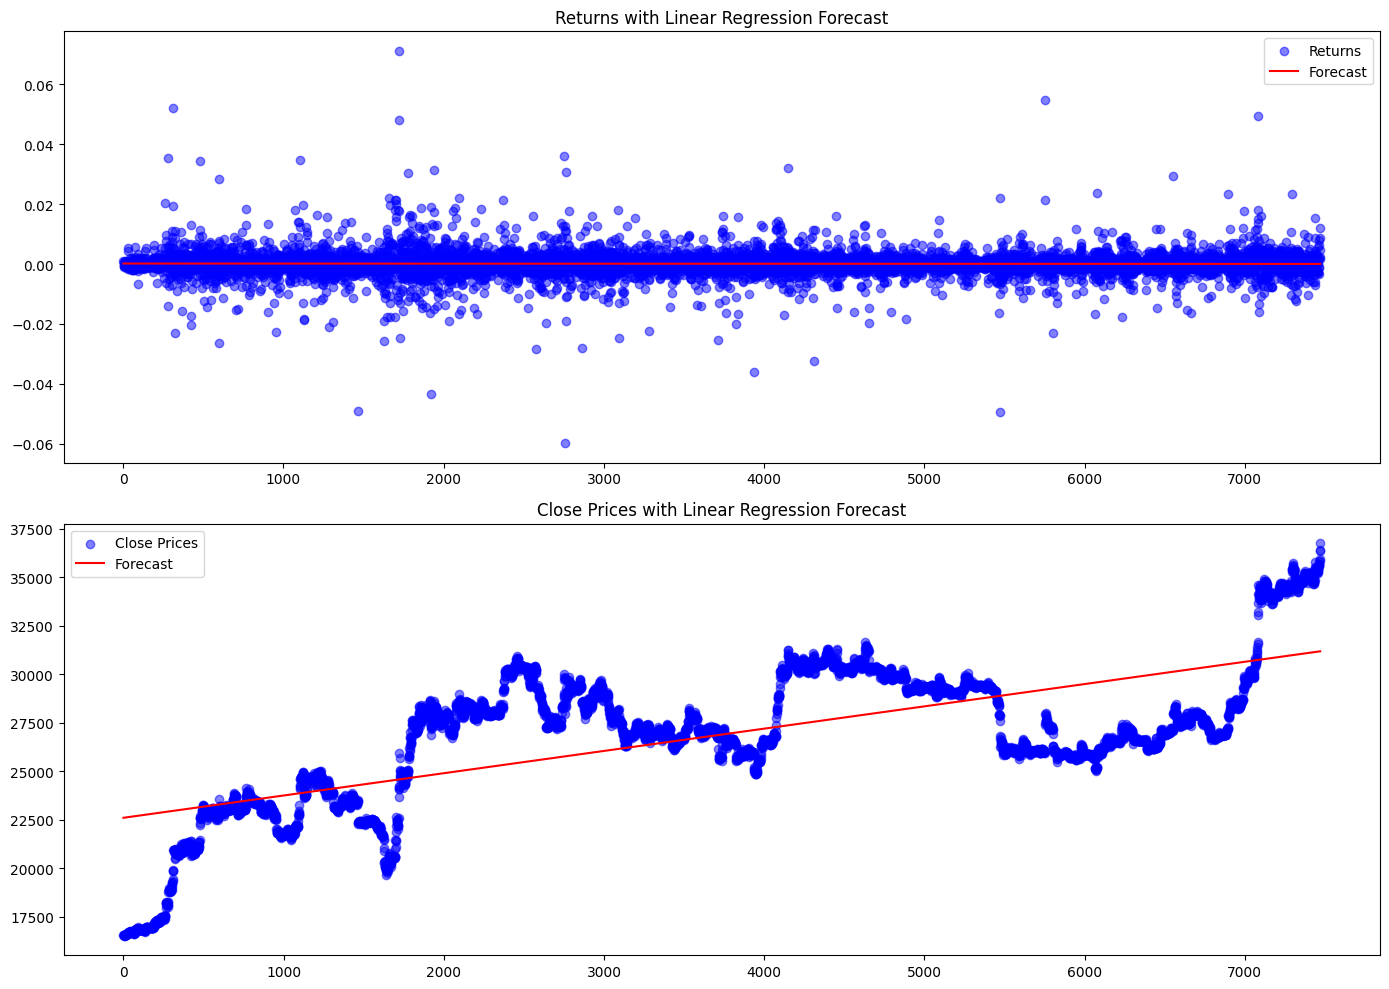

In [ ]:
# Initialization code block provided by the user
from sklearn.linear_model import LinearRegression
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt


tickers = ["BTC-USD"]
labels = ["BITCOIN"]
timeframes = ["60m"]
returns_data = {}
anomalies_data = {}
start_date = '2023-01-01'
end_date = '2023-12-31'

# Now, let's fetch the data and proceed with the forecasting
ticker = yf.Ticker(tickers[0])
history = ticker.history(start=start_date, end=end_date, interval=timeframes[0])

# Calculate returns
history['Returns'] = history['Close'].pct_change().dropna()

# Linear regression for returns
X_returns = np.array(range(len(history['Returns']))).reshape(-1, 1)[1:]  # Reshape for the model and exclude first NaN
y_returns = history['Returns'][1:].values

model_returns = LinearRegression().fit(X_returns, y_returns)
forecast_returns = model_returns.predict(X_returns)

# Linear regression for close prices
X_close = np.array(range(len(history['Close']))).reshape(-1, 1)
y_close = history['Close'].values

model_close = LinearRegression().fit(X_close, y_close)
forecast_close = model_close.predict(X_close)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot for returns
ax[0].scatter(X_returns, y_returns, color='blue', label='Returns', alpha=0.5)
ax[0].plot(X_returns, forecast_returns, color='red', label='Forecast')
ax[0].set_title('Returns with Linear Regression Forecast')
ax[0].legend()

# Plot for close prices
ax[1].scatter(X_close, y_close, color='blue', label='Close Prices', alpha=0.5)
ax[1].plot(X_close, forecast_close, color='red', label='Forecast')
ax[1].set_title('Close Prices with Linear Regression Forecast')
ax[1].legend()

plt.tight_layout()
plt.show()

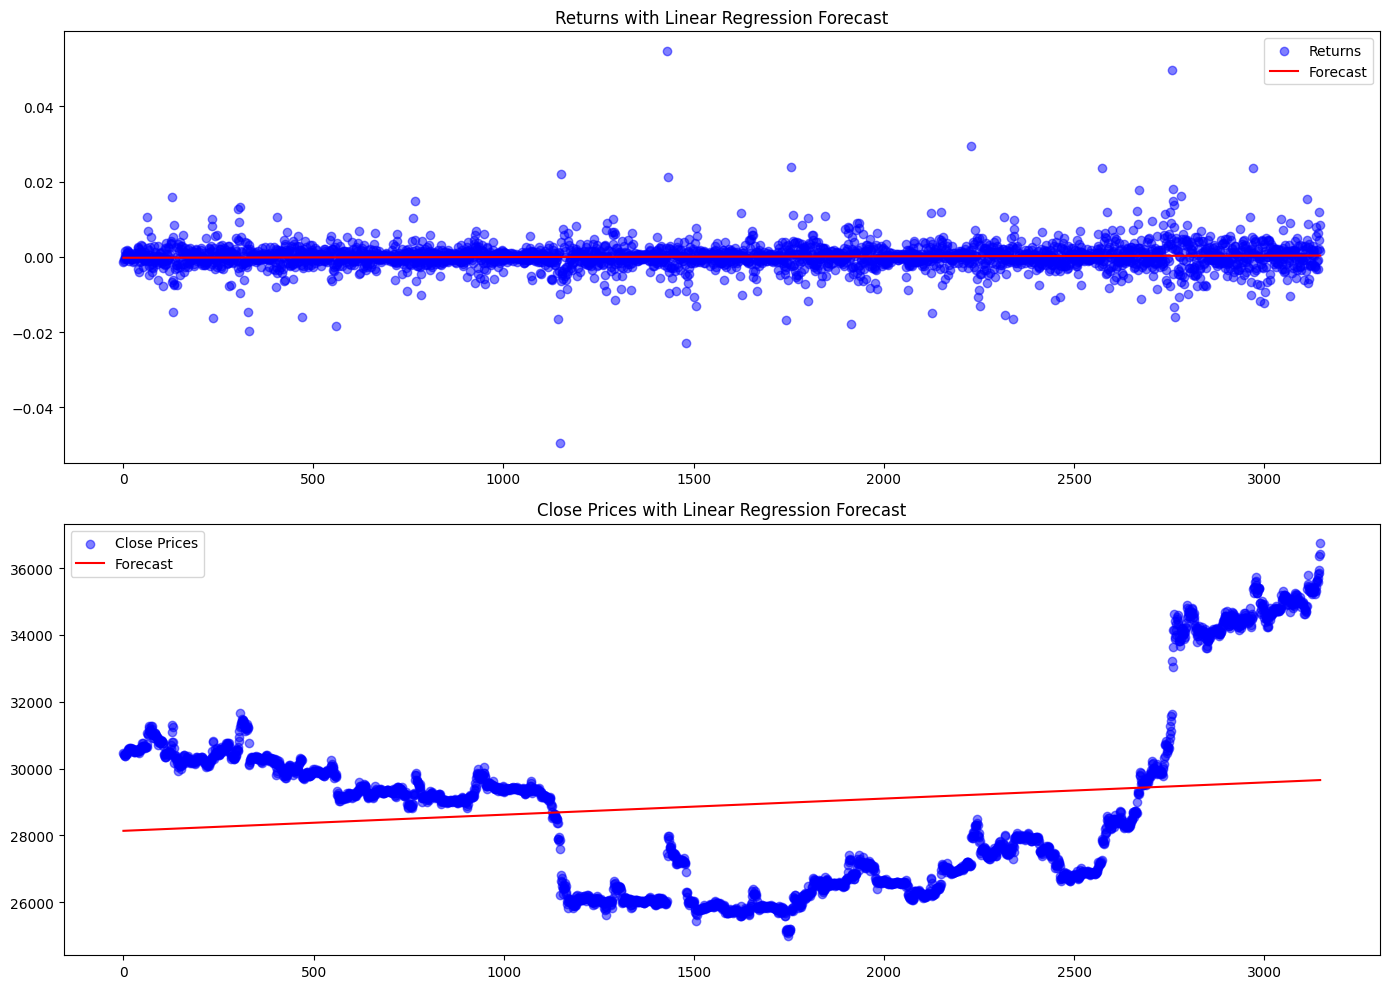

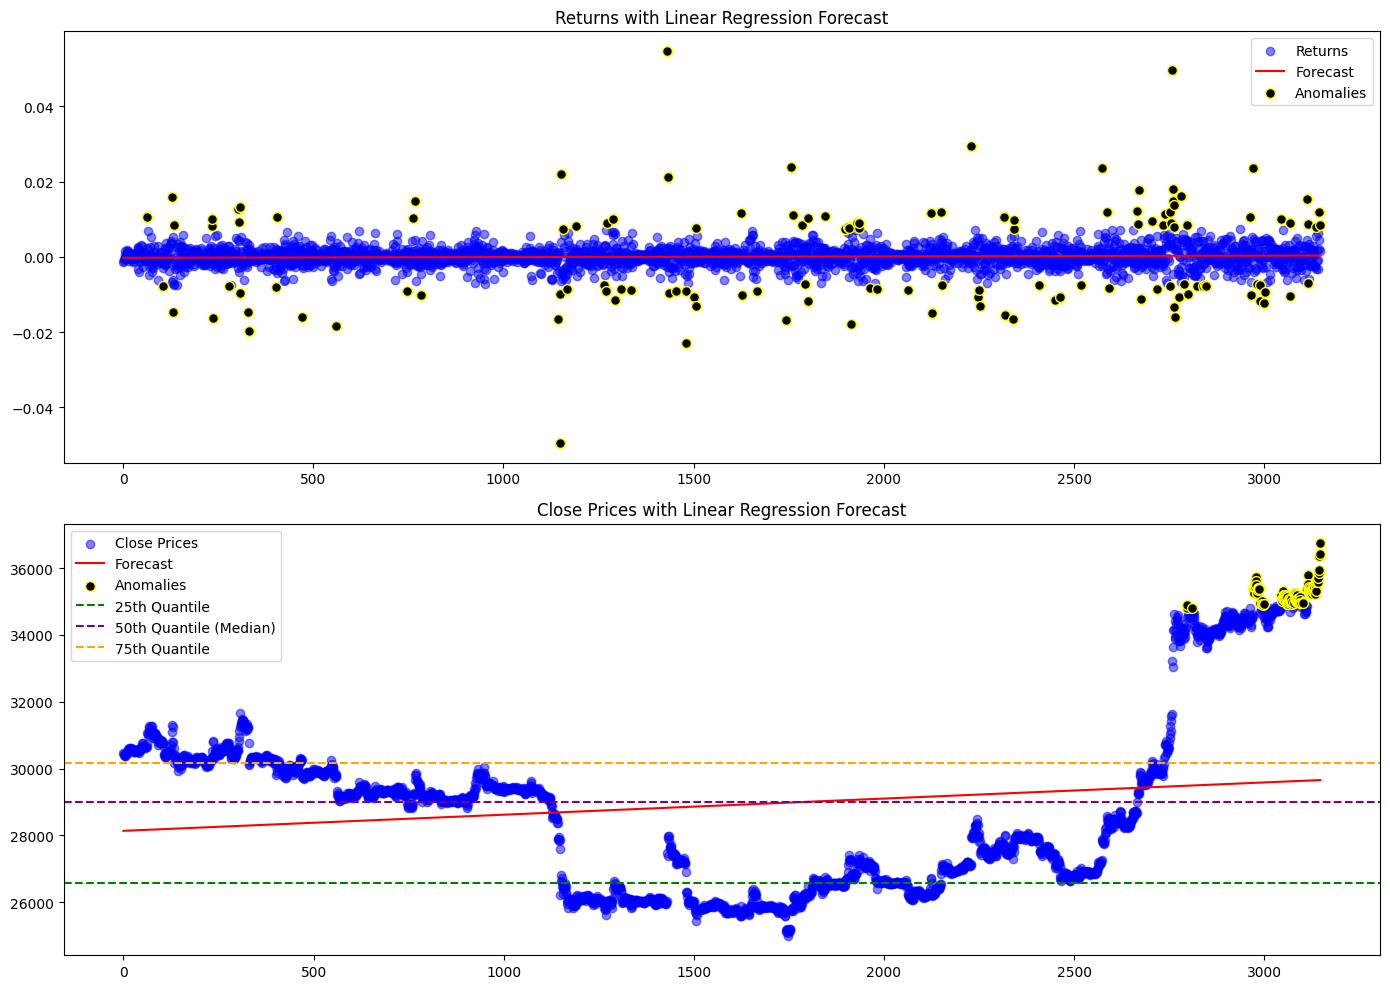

In [ ]:
# Initialization code block provided by the user
from sklearn.linear_model import LinearRegression
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt


tickers = ["BTC-USD"]
labels = ["BITCOIN"]
timeframes = ["60m"]
returns_data = {}
anomalies_data = {}
start_date = '2023-07-01'
end_date = '2023-12-31'

# Now, let's fetch the data and proceed with the forecasting
ticker = yf.Ticker(tickers[0])
history = ticker.history(start=start_date, end=end_date, interval=timeframes[0])

# Calculate returns
history['Returns'] = history['Close'].pct_change().dropna()

# Linear regression for returns
X_returns = np.array(range(len(history['Returns']))).reshape(-1, 1)[1:]  # Reshape for the model and exclude first NaN
y_returns = history['Returns'][1:].values

model_returns = LinearRegression().fit(X_returns, y_returns)
forecast_returns = model_returns.predict(X_returns)

# Linear regression for close prices
X_close = np.array(range(len(history['Close']))).reshape(-1, 1)
y_close = history['Close'].values

model_close = LinearRegression().fit(X_close, y_close)
forecast_close = model_close.predict(X_close)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot for returns
ax[0].scatter(X_returns, y_returns, color='blue', label='Returns', alpha=0.5)
ax[0].plot(X_returns, forecast_returns, color='red', label='Forecast')
ax[0].set_title('Returns with Linear Regression Forecast')
ax[0].legend()

# Plot for close prices
ax[1].scatter(X_close, y_close, color='blue', label='Close Prices', alpha=0.5)
ax[1].plot(X_close, forecast_close, color='red', label='Forecast')
ax[1].set_title('Close Prices with Linear Regression Forecast')
ax[1].legend()

plt.tight_layout()
plt.show()

from scipy.stats import zscore

# ... [previous code initialization]

# Anomaly Detection
# Calculate the z-scores
z_scores_returns = zscore(y_returns - forecast_returns)
z_scores_close = zscore(y_close - forecast_close)

# Define a threshold, for example, 2 standard deviations
threshold = 2

# Find anomalies
anomalies_returns = np.where(np.abs(z_scores_returns) > threshold)[0]
anomalies_close = np.where(np.abs(z_scores_close) > threshold)[0]

# Calculate Quantiles
quantile_25 = np.quantile(y_close, 0.25)
quantile_50 = np.quantile(y_close, 0.5)
quantile_75 = np.quantile(y_close, 0.75)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot for returns
ax[0].scatter(X_returns, y_returns, color='blue', label='Returns', alpha=0.5)
ax[0].plot(X_returns, forecast_returns, color='red', label='Forecast')
ax[0].scatter(X_returns[anomalies_returns], y_returns[anomalies_returns], color='black', label='Anomalies', s=50, edgecolor='yellow')
ax[0].set_title('Returns with Linear Regression Forecast')
ax[0].legend()

# Plot for close prices
ax[1].scatter(X_close, y_close, color='blue', label='Close Prices', alpha=0.5)
ax[1].plot(X_close, forecast_close, color='red', label='Forecast')
ax[1].scatter(X_close[anomalies_close], y_close[anomalies_close], color='black', label='Anomalies', s=50, edgecolor='yellow')
ax[1].axhline(quantile_25, color='green', linestyle='dashed', label='25th Quantile')
ax[1].axhline(quantile_50, color='purple', linestyle='dashed', label='50th Quantile (Median)')
ax[1].axhline(quantile_75, color='orange', linestyle='dashed', label='75th Quantile')
ax[1].set_title('Close Prices with Linear Regression Forecast')
ax[1].legend()

plt.tight_layout()
plt.show()